## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.380240  1.444294 -0.352592  1.278575 -0.618545  1.429939
1  0.099127 -0.144190  0.853941  1.558314  0.933798  1.584533
2 -0.611466 -1.315957 -0.184805  0.073915 -0.933689 -1.492558
3  1.252047  0.094788  1.422225 -0.011597 -1.133359  1.033795
4  1.102230  1.418755 -1.587564 -1.339896  0.675577  0.494418


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9978927	total: 57ms	remaining: 57s
1:	learn: 0.9881065	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9785861	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9701948	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9610302	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9516231	total: 60.6ms	remaining: 10s
6:	learn: 0.9423811	total: 61.1ms	remaining: 8.67s
7:	learn: 0.9329205	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9253541	total: 62.4ms	remaining: 6.87s
9:	learn: 0.9155074	total: 62.9ms	remaining: 6.23s
10:	learn: 0.9061829	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8974066	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8877260	total: 64.5ms	remaining: 4.89s
13:	learn: 0.8787208	total: 65.3ms	remaining: 4.6s
14:	learn: 0.8708662	total: 66.1ms	remaining: 4.34s
15:	learn: 0.8631258	total: 66.6ms	remaining: 4.09s
16:	learn: 0.8574430	total: 67.1ms	remaining: 3.88s
17:	learn: 0.8503216	total: 67.7ms	remaining: 3.69s
18:	learn: 0.8436385	total: 68.1ms	remaining: 3.52s


85:	learn: 0.4808934	total: 102ms	remaining: 1.09s
86:	learn: 0.4768498	total: 103ms	remaining: 1.08s
87:	learn: 0.4727835	total: 104ms	remaining: 1.07s
88:	learn: 0.4695290	total: 104ms	remaining: 1.06s
89:	learn: 0.4660632	total: 104ms	remaining: 1.06s
90:	learn: 0.4622147	total: 105ms	remaining: 1.05s
91:	learn: 0.4587538	total: 105ms	remaining: 1.04s
92:	learn: 0.4550826	total: 106ms	remaining: 1.03s
93:	learn: 0.4508745	total: 106ms	remaining: 1.02s
94:	learn: 0.4468287	total: 107ms	remaining: 1.01s
95:	learn: 0.4431851	total: 107ms	remaining: 1.01s
96:	learn: 0.4400557	total: 108ms	remaining: 1s
97:	learn: 0.4368276	total: 108ms	remaining: 996ms
98:	learn: 0.4334207	total: 109ms	remaining: 990ms
99:	learn: 0.4301867	total: 109ms	remaining: 985ms
100:	learn: 0.4264686	total: 110ms	remaining: 979ms
101:	learn: 0.4231015	total: 111ms	remaining: 973ms
102:	learn: 0.4207833	total: 111ms	remaining: 967ms
103:	learn: 0.4178727	total: 112ms	remaining: 961ms
104:	learn: 0.4147281	total: 1

257:	learn: 0.1489164	total: 186ms	remaining: 535ms
258:	learn: 0.1480137	total: 187ms	remaining: 535ms
259:	learn: 0.1469980	total: 187ms	remaining: 533ms
260:	learn: 0.1461253	total: 188ms	remaining: 532ms
261:	learn: 0.1451285	total: 189ms	remaining: 531ms
262:	learn: 0.1443103	total: 189ms	remaining: 530ms
263:	learn: 0.1435324	total: 190ms	remaining: 529ms
264:	learn: 0.1426522	total: 190ms	remaining: 527ms
265:	learn: 0.1415653	total: 191ms	remaining: 526ms
266:	learn: 0.1408305	total: 191ms	remaining: 525ms
267:	learn: 0.1400422	total: 192ms	remaining: 523ms
268:	learn: 0.1390900	total: 192ms	remaining: 522ms
269:	learn: 0.1380854	total: 193ms	remaining: 521ms
270:	learn: 0.1371409	total: 193ms	remaining: 519ms
271:	learn: 0.1361227	total: 194ms	remaining: 518ms
272:	learn: 0.1354592	total: 194ms	remaining: 517ms
273:	learn: 0.1345673	total: 194ms	remaining: 515ms
274:	learn: 0.1336786	total: 195ms	remaining: 514ms
275:	learn: 0.1328625	total: 195ms	remaining: 512ms
276:	learn: 

451:	learn: 0.0594855	total: 284ms	remaining: 344ms
452:	learn: 0.0593236	total: 285ms	remaining: 344ms
453:	learn: 0.0591638	total: 285ms	remaining: 343ms
454:	learn: 0.0588338	total: 286ms	remaining: 342ms
455:	learn: 0.0585810	total: 286ms	remaining: 341ms
456:	learn: 0.0583334	total: 286ms	remaining: 340ms
457:	learn: 0.0580428	total: 287ms	remaining: 340ms
458:	learn: 0.0577589	total: 287ms	remaining: 339ms
459:	learn: 0.0576058	total: 288ms	remaining: 338ms
460:	learn: 0.0574546	total: 288ms	remaining: 337ms
461:	learn: 0.0571077	total: 289ms	remaining: 336ms
462:	learn: 0.0567669	total: 289ms	remaining: 335ms
463:	learn: 0.0563752	total: 289ms	remaining: 334ms
464:	learn: 0.0560852	total: 290ms	remaining: 334ms
465:	learn: 0.0557640	total: 290ms	remaining: 333ms
466:	learn: 0.0554535	total: 291ms	remaining: 332ms
467:	learn: 0.0550741	total: 292ms	remaining: 332ms
468:	learn: 0.0547009	total: 292ms	remaining: 331ms
469:	learn: 0.0544669	total: 293ms	remaining: 330ms
470:	learn: 

595:	learn: 0.0273803	total: 356ms	remaining: 241ms
596:	learn: 0.0272992	total: 357ms	remaining: 241ms
597:	learn: 0.0272194	total: 358ms	remaining: 240ms
598:	learn: 0.0270657	total: 358ms	remaining: 240ms
599:	learn: 0.0269237	total: 359ms	remaining: 239ms
600:	learn: 0.0268080	total: 360ms	remaining: 239ms
601:	learn: 0.0267310	total: 361ms	remaining: 238ms


602:	learn: 0.0266184	total: 363ms	remaining: 239ms
603:	learn: 0.0265047	total: 365ms	remaining: 239ms
604:	learn: 0.0263684	total: 366ms	remaining: 239ms
605:	learn: 0.0261897	total: 366ms	remaining: 238ms
606:	learn: 0.0261156	total: 367ms	remaining: 238ms
607:	learn: 0.0259784	total: 368ms	remaining: 237ms
608:	learn: 0.0258054	total: 368ms	remaining: 236ms
609:	learn: 0.0256775	total: 369ms	remaining: 236ms
610:	learn: 0.0255124	total: 370ms	remaining: 235ms
611:	learn: 0.0253457	total: 370ms	remaining: 235ms
612:	learn: 0.0251851	total: 371ms	remaining: 234ms
613:	learn: 0.0250567	total: 372ms	remaining: 234ms
614:	learn: 0.0249545	total: 372ms	remaining: 233ms
615:	learn: 0.0247988	total: 373ms	remaining: 232ms
616:	learn: 0.0246401	total: 373ms	remaining: 232ms
617:	learn: 0.0245118	total: 374ms	remaining: 231ms
618:	learn: 0.0243607	total: 374ms	remaining: 230ms
619:	learn: 0.0243265	total: 375ms	remaining: 230ms
620:	learn: 0.0241738	total: 375ms	remaining: 229ms
621:	learn: 

723:	learn: 0.0159390	total: 432ms	remaining: 165ms
724:	learn: 0.0158815	total: 432ms	remaining: 164ms
725:	learn: 0.0158182	total: 433ms	remaining: 163ms
726:	learn: 0.0157718	total: 433ms	remaining: 163ms
727:	learn: 0.0157505	total: 434ms	remaining: 162ms
728:	learn: 0.0156923	total: 434ms	remaining: 161ms
729:	learn: 0.0156291	total: 435ms	remaining: 161ms
730:	learn: 0.0155654	total: 435ms	remaining: 160ms
731:	learn: 0.0155049	total: 436ms	remaining: 160ms
732:	learn: 0.0154400	total: 436ms	remaining: 159ms
733:	learn: 0.0153847	total: 437ms	remaining: 158ms
734:	learn: 0.0153631	total: 437ms	remaining: 158ms
735:	learn: 0.0153120	total: 437ms	remaining: 157ms
736:	learn: 0.0152920	total: 438ms	remaining: 156ms
737:	learn: 0.0152314	total: 439ms	remaining: 156ms
738:	learn: 0.0151737	total: 439ms	remaining: 155ms
739:	learn: 0.0151168	total: 440ms	remaining: 155ms
740:	learn: 0.0150610	total: 441ms	remaining: 154ms
741:	learn: 0.0150076	total: 441ms	remaining: 153ms
742:	learn: 

919:	learn: 0.0088005	total: 530ms	remaining: 46.1ms
920:	learn: 0.0087777	total: 530ms	remaining: 45.5ms
921:	learn: 0.0087606	total: 531ms	remaining: 44.9ms
922:	learn: 0.0087382	total: 532ms	remaining: 44.4ms
923:	learn: 0.0086877	total: 532ms	remaining: 43.8ms
924:	learn: 0.0086655	total: 533ms	remaining: 43.2ms
925:	learn: 0.0086437	total: 533ms	remaining: 42.6ms
926:	learn: 0.0086012	total: 534ms	remaining: 42ms
927:	learn: 0.0085636	total: 534ms	remaining: 41.4ms
928:	learn: 0.0085471	total: 535ms	remaining: 40.9ms
929:	learn: 0.0085105	total: 535ms	remaining: 40.3ms
930:	learn: 0.0084945	total: 536ms	remaining: 39.7ms
931:	learn: 0.0084733	total: 536ms	remaining: 39.1ms
932:	learn: 0.0084575	total: 537ms	remaining: 38.5ms
933:	learn: 0.0084367	total: 537ms	remaining: 37.9ms
934:	learn: 0.0084162	total: 537ms	remaining: 37.4ms
935:	learn: 0.0084008	total: 538ms	remaining: 36.8ms
936:	learn: 0.0083806	total: 538ms	remaining: 36.2ms
937:	learn: 0.0083655	total: 539ms	remaining: 35

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

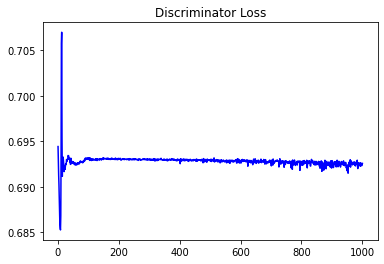

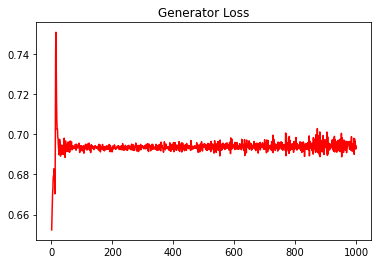

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10533518703429808


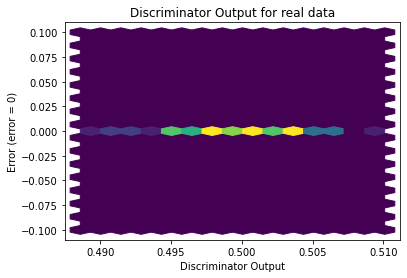

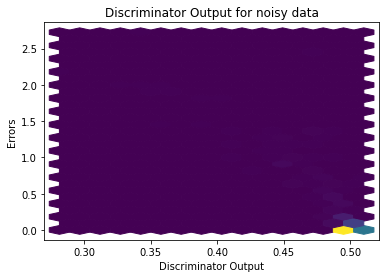

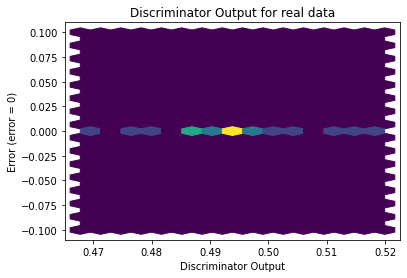

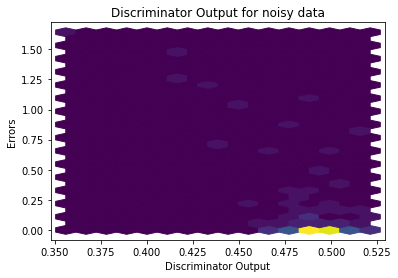

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


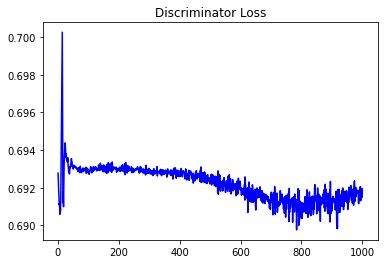

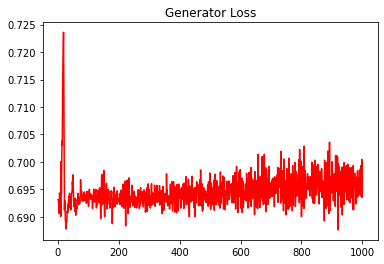

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08948055221759772


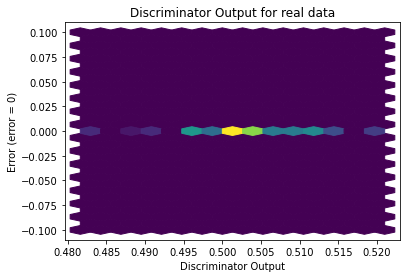

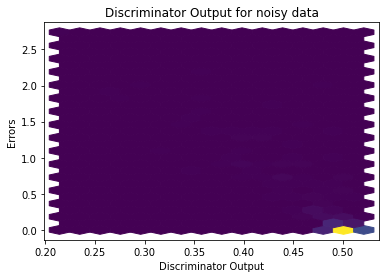

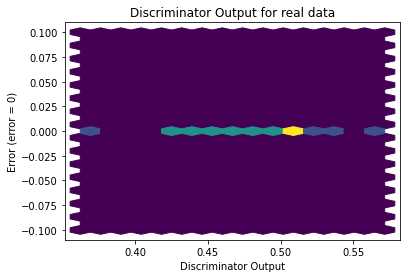

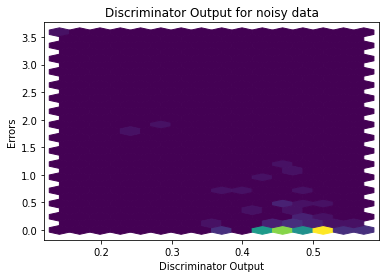

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3262]], requires_grad=True)
